/tmp/ipython-input-5-3531995874.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tcs=yf.download('TCS.NS',start='2018-01-01',end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


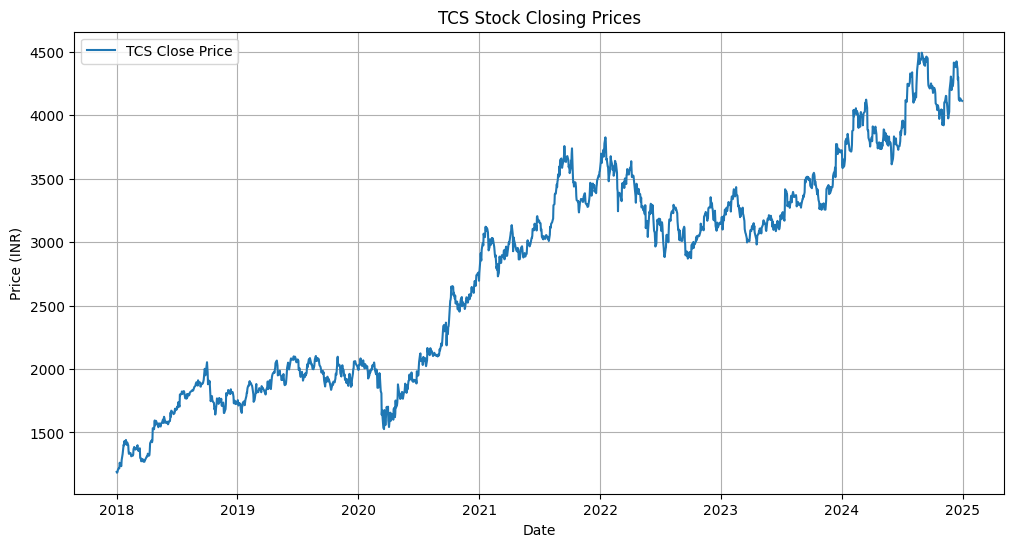

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
tcs=yf.download('TCS.NS',start='2018-01-01',end='2024-12-31')
data=tcs[['Close']].values
scaler=MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(data)
plt.figure(figsize=(12,6))
plt.plot(tcs.index, data, label='TCS Close Price')
plt.title('TCS Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.grid()
plt.legend()
plt.show()


In [6]:
sequence_length = 60
train_size=int(len(scaled_data)*0.8)
train_data=scaled_data[:train_size]
test_data=scaled_data[train_size-sequence_length:]
def create_sequences(dataset,seq_length):
    X,y=[],[]
    for i in range(seq_length,len(dataset)):
        X.append(dataset[i-seq_length:i,0])
        y.append(dataset[i,0])
    return np.array(X),np.array(y)
X_train, y_train=create_sequences(train_data,sequence_length)
X_test, y_test=create_sequences(test_data,sequence_length)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)


X_train shape: (1320, 60, 1)
X_test shape: (346, 60, 1)


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
history=model.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 0.0578 - val_loss: 0.0125
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0041 - val_loss: 0.0026
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0020 - val_loss: 0.0026
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0023 - val_loss: 0.0041
Epoch 9/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 10/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 11/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 12/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


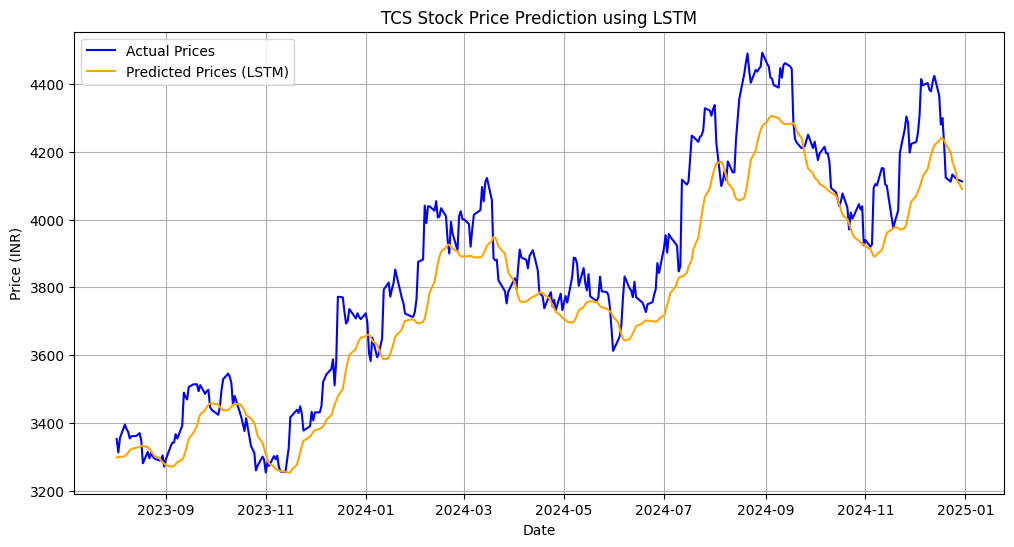

In [8]:
predicted_prices=model.predict(X_test)
predicted_prices=scaler.inverse_transform(predicted_prices.reshape(-1,1))
actual_prices=scaler.inverse_transform(y_test.reshape(-1,1))
prediction_dates=tcs.index[-len(actual_prices):]
plt.figure(figsize=(12,6))
plt.plot(prediction_dates,actual_prices,label="Actual Prices",color='blue')
plt.plot(prediction_dates,predicted_prices,label="Predicted Prices (LSTM)",color='orange')
plt.title("TCS Stock Price Prediction using LSTM")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.show()